# Predicting Football Player Value based on their FIFA 23 ratings

## Introduction
FIFA 23 is a football simulation video game published by Electronic Arts. It is the 30th and final installment in the FIFA series that is developed by EA Sports, and released worldwide on 30 September 2022 for PC, Nintendo Switch, PlayStation 4, PlayStation 5, Xbox One, Xbox Series X/S and Google Stadia.

The goal of this project is to predict a player's value based on their attributes and in -game ratings.

## Dataset 
The data is collected from [Kaggle](https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset): *Fifa 23 Players Dataset*

There are 18,539 records in the dataset, and the data is described by 89 attributes. It contains the information regarding each player in the game including their personal information, physical attributes, ratings, and the value. The goal of this dataset is to predict a player's value based on its game ratings.

### Import standard Python libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading and loading the data into a Dataframe object
The first step is to call the .csv file on my Google Drive then mount the Drive folder to the notebook.

In [2]:
import pandas as pd

df = pd.read_csv("Fifa 23 Players Data.csv")

df = pd.DataFrame(df)

# To ensure the read is valid, I will print the first 5 data 
pd.set_option('display.max_columns', None)
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [3]:
df.shape

(18539, 89)

### Cleaning the Dataframe
In this step, we will ensure that all data in the dataset are valid, meaning there are no null values and no duplicate entries.

In [4]:
df = df.dropna()

In [5]:
df = df.drop_duplicates()

# After removing the duplicate entries, we are left with 18420 players.
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,20,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,40

In [6]:
df.dtypes

Known As          object
Full Name         object
Overall            int64
Potential          int64
Value(in Euro)     int64
                   ...  
RWB Rating         int64
LB Rating          int64
CB Rating          int64
RB Rating          int64
GK Rating          int64
Length: 89, dtype: object

### Data Processing
In this step, we will remove irrelevant columns that can't be used to determine a player's value, such as the nickname, image url, other positions player, release clause value, club position,  .

In [7]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['known_as', 'full_name', 'overall', 'potential', 'value(in_euro)',
       'positions_played', 'best_position', 'nationality', 'image_link', 'age',
       'height(in_cm)', 'weight(in_kg)', 'totalstats', 'basestats',
       'club_name', 'wage(in_euro)', 'release_clause', 'club_position',
       'contract_until', 'club_jersey_number', 'joined_on', 'on_loan',
       'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'national_team_name',
       'national_team_image_link', 'national_team_position',
       'national_team_jersey_number', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_powe

In [9]:
# Dropping irrelevant columns
df.drop(['known_as', 'positions_played', 'image_link', 'release_clause', 'club_position',
       'contract_until', 'club_jersey_number', 'joined_on', 'on_loan', 'international_reputation', 
       'national_team_name', 'national_team_image_link', 'national_team_position','national_team_jersey_number', 
       'st_rating', 'lw_rating', 'lf_rating', 'cf_rating', 'rf_rating', 'rw_rating','cam_rating', 'lm_rating', 
       'cm_rating', 'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating', 'cb_rating', 'rb_rating',
       'gk_rating'], axis = 1, inplace = True)
df

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,455,Real Madrid CF,450000,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,483,Manchester City,350000,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,CAM,Republic of Ireland,21,174,68,1287,274,Sligo Rovers,500,Right,3,2,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8
18535,Dejiang Yang,47,57,90000,CDM,China PR,17,175,60,1289,267,Guangzhou FC,500,Right,3,2,Medium,Medium,55,37,41,47,48,39,34,33,44,46,31,42,32,31,45,46,52,57,59,51,80,50,55,34,35,35,52,46,35,40,33,45,46,50,52,6,12,11,8,6
18536,Liam Mullan,47,67,130000,RM,Northern Ireland,18,170,65,1333,277,Derry City,500,Right,3,2,High,Medium,64,40,49,52,37,35,41,36,42,54,37,52,47,42,52,50,70,59,46,49,73,54,54,36,31,36,39,24,42,50,43,59,39,37,48,11,12,8,7,12
18537,Daithí McCallion,47,61,100000,CB,Republic of Ireland,17,178,65,1113,226,Derry City,500,Right,3,2,Medium,Medium,52,24,25,32,52,41,21,20,41,25,27,27,26,20,22,26,53,51,42,43,66,34,72,49,34,18,42,54,23,32,37,41,50,54,54,8,14,13,7,8


In [10]:
df.nunique()

full_name                 18337
overall                      45
potential                    48
value(in_euro)              257
best_position                15
nationality                 160
age                          28
height(in_cm)                49
weight(in_kg)                54
totalstats                 1411
basestats                   248
club_name                   679
wage(in_euro)               133
preferred_foot                2
weak_foot_rating              5
skill_moves                   5
attacking_work_rate           3
defensive_work_rate           3
pace_total                   70
shooting_total               75
passing_total                68
dribbling_total              67
defending_total              76
physicality_total            62
crossing                     88
finishing                    92
heading_accuracy             88
short_passing                84
volleys                      88
dribbling                    92
curve                        88
freekick

In [11]:
# Add a new column that classifies a player's position (Defender, Midfielder, or Forward)

defender = ['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB']
midfielder = ['CM', 'LM', 'RM', 'CDM', 'CAM']
forward = ['ST', 'LW', 'RW', 'CF']

pos_pos = {'DEFENDER': defender, 'MIDFIELDER': midfielder, 'FORWARD': forward}

for x in pos_pos:
    df.loc[df['best_position'].isin(pos_pos[x]),'position'] = x


df[['full_name','best_position','position']].sample(8)

,full_name,best_position,position
17561,Salifou Soumah,ST,FORWARD
17100,Nigel van Haveren,GK,DEFENDER
12168,Jay Idzes,CB,DEFENDER
4370,Agustín Medina Delgado,CDM,MIDFIELDER
11739,Ricki Lamie,CB,DEFENDER
13420,Jake Cain,CAM,MIDFIELDER
447,Guillermo Ochoa,GK,DEFENDER
5524,Gianluca Frabotta,LWB,DEFENDER


#### Create a new Dataframe with One hot Encoding on Categorical Columns

In [12]:
categorical_cols = ['nationality', 'best_position', 'position', 'club_name', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'] 

df_ohe = df

for col in categorical_cols:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)

In [13]:
df_ohe

,full_name,overall,potential,value(in_euro),age,height(in_cm),weight(in_kg),totalstats,basestats,wage(in_euro),weak_foot_rating,skill_moves,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,nationality_Afghanistan,nationality_Albania,nationality_Algeria,nationality_Andorra,nationality_Angola,nationality_Antigua and Barbuda,nationality_Argentina,nationality_Armenia,nationality_Australia,nationality_Austria,nationality_Azerbaijan,nationality_Barbados,nationality_Belarus,nationality_Belgium,nationality_Benin,nationality_Bermuda,nationality_Bolivia,nationality_Bosnia and Herzegovina,nationality_Brazil,nationality_Bulgaria,nationality_Burkina Faso,nationality_Burundi,nationality_Cameroon,nationality_Canada,nationality_Cape Verde Islands,nationality_Central African Republic,nationality_Chad,nationality_Chile,nationality_China PR,nationality_Chinese Taipei,nationality_Colombia,nationality_Comoros,nationality_Congo,nationality_Congo DR,nationality_Costa Rica,nationality_Croatia,nationality_Cuba,nationality_Curacao,nationality_Cyprus,nationality_Czech Republic,nationality_Côte d'Ivoire,nationality_Denmark,nationality_Dominican Republic,nationality_Ecuador,nationality_Egypt,nationality_El Salvador,nationality_England,nationality_Equatorial Guinea,nationality_Estonia,nationality_Ethiopia,nationality_Faroe Islands,nationality_Fiji,nationality_Finland,nationality_France,nationality_Gabon,nationality_Gambia,nationality_Georgia,nationality_Germany,nationality_Ghana,nationality_Gibraltar,nationality_Greece,nationality_Grenada,nationality_Guam,nationality_Guatemala,nationality_Guinea,nationality_Guinea Bissau,nationality_Guyana,nationality_Haiti,nationality_Honduras,nationality_Hong Kong,nationality_Hungary,nationality_Iceland,nationality_India,nationality_Indonesia,nationality_Iran,nationality_Iraq,nationality_Israel,nationality_Italy,nationality_Jamaica,nationality_Japan,nationality_Jordan,nationality_Kazakhstan,nationality_Kenya,nationality_Korea DPR,nationality_Korea Republic,nationality_Kosovo,nationality_Latvia,nationality_Lebanon,nationality_Liberia,nationality_Libya,nationality_Liechtenstein,nationality_Lithuania,nationality_Luxembourg,nationality_Madagascar,nationality_Mali,nationality_Malta,nationality_Mauritania,nationality_Mauritius,nationality_Mexico,nationality_Moldova,nationality_Montenegro,nationality_Montserrat,nationality_Morocco,nationality_Mozambique,nationality_Namibia,nationality_Netherlands,nationality_New Zealand,nationality_Nigeria,nationality_North Macedonia,nationality_Northern Ireland,nationality_Norway,nationality_Palestine,nationality_Panama,nationality_Papua New Guinea,nationality_Paraguay,nationality_Peru,nationality_Philippines,nationality_Poland,nationality_Portugal,nationality_Puerto Rico,nationality_Qatar,nationality_Republic of Ireland,nationality_Romania,nationality_Russia,nationality_Saint Kitts and Nevis,nationality_Saint Lucia,nationality_Saudi Arabia,nationality_Scotland,nationality_Senegal,nationality_Serbia,nationality_Sierra Leone,nationality_Singapore,nationality_Slovakia,nationality_Slovenia,nationality_South Africa,nationality_South Sudan,nationality_Spain,nationality_Sudan,nationality_Suriname,nationality_Sweden,nationality_Switzerland,nationality_Syria,nationality_São Tomé e Príncipe,nationality_Tanzania,nationality_Thailand,nationality_Togo,nationality_Trinidad and Tobago,nationality_Tunisia,nationality_Turkey,nationality_Uganda,nationality_Ukraine,nationality_United Arab Emirates,nationality_United States,nationality_Uruguay,nationality_Uzbeki

## Data Visualization

In [14]:
# Create a new DataFrame that contains sorted values based on the Position, and its value
df_mapping = pd.DataFrame({
    'pos': ['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB', 'CM', 'LM', 'RM', 'CDM', 'CAM','ST', 'LW', 'RW', 'CF']})
sort_mapping = df_mapping.reset_index().set_index('pos')
df['best_position_index'] = df['best_position'].map(sort_mapping['index'])
sorted_df = df.sort_values(['best_position_index', 'value(in_euro)'])
sorted_df.head()

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,position,best_position_index
438,Tomáš Vaclík,80,80,0,GK,Czech Republic,33,188,85,1309,432,Free agent,0,Right,3,1,Medium,Medium,78,75,74,83,40,82,15,14,19,28,13,14,17,16,45,20,42,37,47,78,56,56,72,38,71,16,29,23,15,67,13,63,20,18,18,78,75,74,82,83,DEFENDER,0
447,Guillermo Ochoa,80,80,0,GK,Mexico,36,185,78,1265,440,Free agent,0,Right,3,1,Medium,Medium,82,73,70,84,50,81,15,12,19,37,16,10,14,17,37,20,50,50,57,70,43,53,79,38,60,11,19,23,16,50,16,60,21,10,12,82,73,70,81,84,DEFENDER,0
548,Alfredo Talavera,79,79,0,GK,Mexico,39,186,85,1345,446,Free agent,0,Right,4,1,Medium,Medium,80,82,68,80,58,78,15,13,14,35,13,10,15,14,35,21,58,58,57,70,47,51,77,36,82,13,38,24,14,50,44,60,26,13,14,80,82,68,78,80,DEFENDER,0
865,Milan Borjan,77,77,0,GK,Canada,34,196,84,1360,423,Free agent,0,Right,2,1,Medium,Medium,78,74,75,78,44,74,15,15,24,38,19,28,16,16,48,23,47,40,40,73,46,56,68,40,79,12,44,24,14,57,34,60,21,23,21,78,74,75,74,78,DEFENDER,0
1232,Florin Niță,76,76,0,GK,Romania,34,184,78,1081,403,Free agent,0,Right,2,1,Medium,Medium,76,76,69,78,27,77,14,8,13,23,5,18,10,13,22,11,25,31,28,64,64,52,61,36,79,5,20,8,4,39,11,62,14,13,14,76,76,69,77,78,DEFENDER,0


In [15]:
# Show the highest value player for each position
df.sort_values(by='value(in_euro)', ascending=False).groupby('best_position')[['full_name', 'best_position', 'value(in_euro)']].head(1)

,full_name,best_position,value(in_euro)
4,Kylian Mbappé,ST,190500000
42,Frenkie de Jong,CM,116500000
5,Mohamed Salah,RW,115500000
83,Phil Foden,CAM,109500000
63,Vinícius José de Oliveira Júnior,LW,109000000
20,Rúben Santos Gato Alves Dias,CB,107500000
17,Joshua Kimmich,CDM,105500000
22,Gianluigi Donnarumma,GK,103500000
15,Sadio Mané,LM,99500000
24,João Pedro Cavaco Cancelo,LB,82500000


In [16]:
stats_cols=['pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
       'goalkeeper_positioning', 'goalkeeper_reflexes']
print('BEST IN DIFFERENT ASPECTS (Player Name, Overall):')
print('_________________________________________________\n')

for x in stats_cols:
    print('Best {0} : {1}, {2}'.format(x, df.loc[df[x].idxmax()][0], df.loc[df[x].idxmax()][1]))


BEST IN DIFFERENT ASPECTS (Player Name, Overall):
_________________________________________________

Best pace_total : Kylian Mbappé, 91
Best shooting_total : C. Ronaldo dos Santos Aveiro, 90
Best passing_total : Kevin De Bruyne, 91
Best dribbling_total : Lionel Messi, 91
Best defending_total : Virgil van Dijk, 90
Best physicality_total : Manuel Neuer, 90
Best crossing : Kevin De Bruyne, 91
Best finishing : Robert Lewandowski, 91
Best heading_accuracy : Luuk de Jong, 79
Best short_passing : Kevin De Bruyne, 91
Best volleys : Lautaro Martínez, 86
Best dribbling : Lionel Messi, 91
Best curve : Lionel Messi, 91
Best freekick_accuracy : James Ward-Prowse, 81
Best longpassing : Kevin De Bruyne, 91
Best ballcontrol : Neymar da Silva Santos Jr., 89
Best acceleration : Kylian Mbappé, 91
Best sprint_speed : Kylian Mbappé, 91
Best agility : Bernardo Mota Carvalho e Silva, 88
Best reactions : C. Ronaldo dos Santos Aveiro, 90
Best balance : Lionel Messi, 91
Best shot_power : Erling Haaland, 88
Bes

In [17]:
# Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['nationality'].nunique()))
print(df['nationality'].value_counts().head(5))

Total number of countries : 160
England      1624
Germany      1201
Spain        1062
France        953
Argentina     931
Name: nationality, dtype: int64


In [18]:
# Clubs with the highest total value
print('Top 5 clubs with the highest total player value:')
df.groupby('club_name')['value(in_euro)'].sum().nlargest(5)


Top 5 clubs with the highest total player value:


club_name
Manchester City        1248655000
Liverpool              1098825000
Paris Saint-Germain    1051375000
Real Madrid CF         1024625000
FC Barcelona           1013125000
Name: value(in_euro), dtype: int64

In [19]:
print('Distribution of top 100 players overall:')
print(df['overall'].head(100).value_counts().sort_index(ascending = False))

Distribution of top 100 players overall:
91     5
90     5
89    10
88    10
87    13
86    22
85    26
84     9
Name: overall, dtype: int64


Text(0, 0.5, 'Total Player')

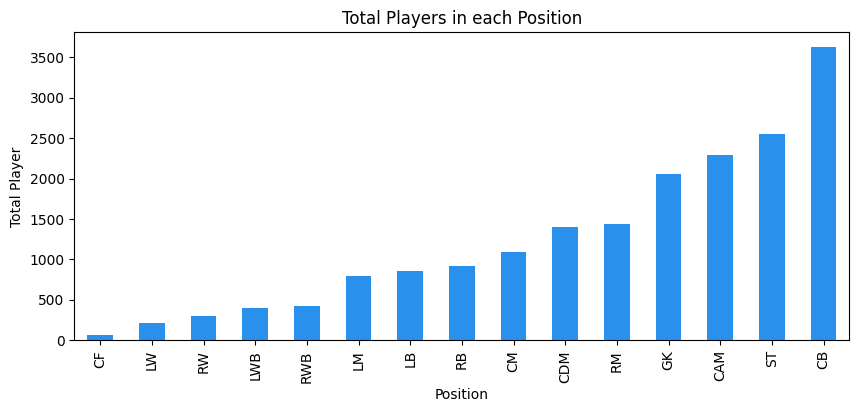

In [20]:
# Create a bar chart for every position sorted by the count
plt.figure(figsize=(10,4))
df.groupby('best_position').size().sort_values().plot(kind='bar', color='#2990ec')
plt.title('Total Players in each Position')
plt.xlabel('Position')
plt.ylabel('Total Player')

Text(0, 0.5, 'Total Player')

<Figure size 1000x400 with 0 Axes>

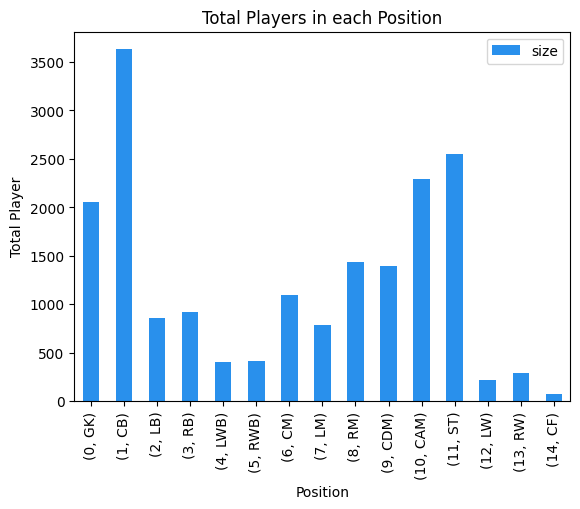

In [21]:
test1 = df.groupby(['best_position_index', 'best_position']).size().to_frame('size')

test1.sort_values(by = 'best_position_index', ascending = False).reset_index()

plt.figure(figsize=(10,4))
test1.plot(kind='bar', color='#2990ec')
plt.title('Total Players in each Position')
plt.xlabel('Position')
plt.ylabel('Total Player')


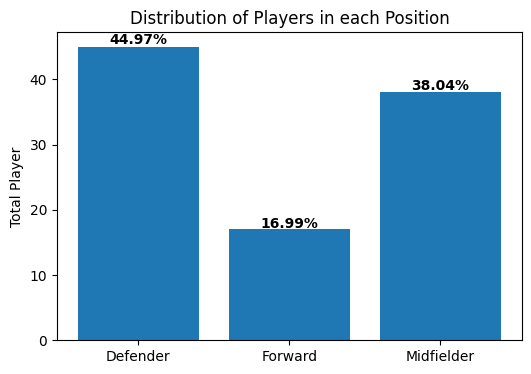

In [22]:
total_players = df['position'].count()

position_count_df = df.groupby(['position']).size().to_frame('size')
position_count_df.sort_values(by = 'position', ascending = False).reset_index()

# compute percentage of each format
percentage = []
 
for i in range(position_count_df.shape[0]):
    pct = (position_count_df.iloc[i]['size'] / total_players) * 100
    percentage.append(round(pct, 2))

position_count_df['Percentage'] = percentage

 
# depict illustration
plt.figure(figsize=(6, 4))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(['Defender', 'Forward', 'Midfielder'], position_count_df['Percentage'])

 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(position_count_df.iloc[i]['Percentage'])+'%',
             ha='center',
             weight='bold')
    i+=1
    
plt.title('Distribution of Players in each Position')
plt.ylabel('Total Player')
plt.show()

In [23]:
pd.set_option('display.max_columns', None)
df.head()

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,position,best_position_index
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,MIDFIELDER,10
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,455,Real Madrid CF,450000,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,FORWARD,14
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,FORWARD,11
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,483,Manchester City,350000,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,MIDFIELDER,6
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,FORWARD,11


## Data Analysis
Some models that will be tested using the data we have are:
1. Linear Regression: Unvariable and Multivariate
2. KNN (K-nearest Neighbors)
3. Decision Tree Regressor
4. Random Forest
5. XGBoosting
6. Neural Networks

In [24]:
X  = df[['overall']]
y = df['value(in_euro)']

### 1A - Unvariable Linear Regression
The first model we'll try is the unvariable linear regression, where we train a univariate linear regression model that predicts the value of a player using only its in-game overall (the 'overall' feature).


### Split the data set into a training set (80%) and a test set (20%)

The **training set** is the subset of data used to train the model. The **test set** is the subset of data used to test (i.e. evaluate) the trained model. After splitting, **X_train** and **y_train** respectively contain the input features and true output values of the data in the training set, called the *training examples*. *Both* **X_train** and **y_train** will be used for training the model. This is an example of **Supervised Learning**. Likewise, **X_test** and **y_test** respectively contain the input features and true output values of the data in the test set, called the *test examples*. After the model is trained, provided that it performs well on the training set, the model will be used to make predictions on **X_test**. The predictions will be compared against the true output values in **y_test**, and the result of comparison will be used as an estimate of the model's performance on data unseen.

In [25]:
from sklearn.model_selection import train_test_split

#stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (14736, 1)
y_train.shape =  (14736,)
X_test.shape =  (3684, 1)
y_test.shape =  (3684,)


In [26]:
X_train.head()

,overall
17645,54
10684,65
11288,64
16870,57
5432,69


In [27]:
y_train.head()

17645     120000
10684     650000
11288    1400000
16870     325000
5432      675000
Name: value(in_euro), dtype: int64

#### Train the model
Now that the data is prepared, we are ready to train the model.

In [28]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

#### Parameters of the Model

We can find the parameters of the model by its **coef_** and **intercept_** attributes. In a plane, a line described by an equation of the form

\begin{equation}
y = ax + b
\end{equation}

The coefficient (slope) $a$ is given by the **coef_** attribute, and the intercept $b$ by the **intercept_** attribute. Therefore, the univariate linear model predicts the value of a player as

\begin{equation}
\text{predicted value} \; = \; \text{coef_} \: \times \: \text{overall} \: + \: \text{intercept_} 
\end{equation}

In [29]:
lr.coef_

array([623080.73845632])

In [30]:
lr.intercept_

-38166980.40578495

#### Make a prediction

Now that the model is trained, we can use it to make a prediction, as follows. In the example below, the input to the method **predict** is a DataFrame with a single column consisting of the in-game overall. The output is a one-dimensional NumPy array consisting of the values of the players. Note that the input to the method **predict** is two-dimensional, even if there is only one feature (column).

In [31]:
X_sample = X_train.iloc[:3]
X_sample

,overall
17645,54
10684,65
11288,64


In [32]:
lr.predict(X_sample)

array([-4520620.52914385,  2333267.59387563,  1710186.85541932])

In [33]:
y_train.iloc[:3].values

array([ 120000,  650000, 1400000], dtype=int64)

Now that the model has been trained, let's see how well it works on the data used to train the model.
#### Use the trained model to predict the value of players in the training set

In [34]:
y_train_pred = lr.predict(X_train)

#### Plot the <font color='red'> predicted </font> value of players (the <font color='red'> red </font> line) and the <font color='blue'> true </font> value of players (the <font color='blue'> blue </font> dots) for the training set

Text(0, 0.5, 'Value (in Euro)')

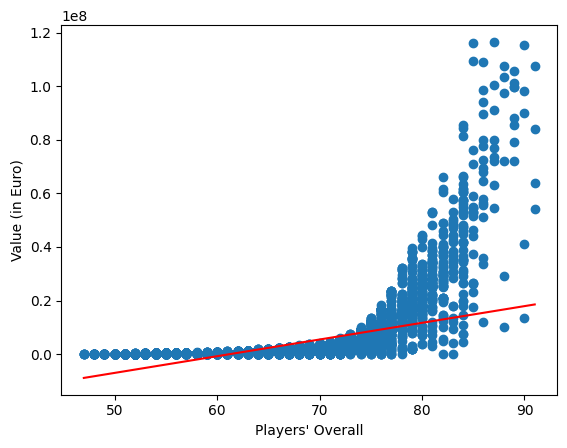

In [35]:
plt.scatter(X_train['overall'], y_train)

x_min = X_train['overall'].min()
x_max = X_train['overall'].max()
x_plot = np.linspace(x_min, x_max, 10000)
y_plot = lr.coef_ * x_plot + lr.intercept_
plt.plot(x_plot, y_plot, color='r')
plt.xlabel("Players' Overall")
plt.ylabel('Value (in Euro)')

#### Compute the $R^2$-score of the model on the training set 

The $R^2$-score, also known as the coefficient of determination, is a measure of the performance of a regression model. Its best possible value is 1.

In [36]:
from sklearn.metrics import r2_score

lr1_train_rscore = r2_score(y_train, y_train_pred)
lr1_train_rscore

0.32070655872118725

#### Remark

The above plot and the low $R^2$-score indicate that the simple univariate linear regression model performs poorly on the training data set, *even when* the true value of every players in the training set is given for training. This is however expected because the model uses only the overall to predict the value of a player, while many other features affect the value. This phenomenon of an ML model fitting the data poorly, is known as **underfitting**. It implies that the current model is insufficient, and an improved model using more features is needed for better predictions.

### 1B - Multivariate Linear Regression

We now build a mutivariate linear regression model to predict the value of a player, using all the relevant features in the dataset.

#### Prepare Data

First we prepare the data by extracting the players' information relevant for predicting their values.

#### Create a pandas DataFrame consisting of the features relevant for predicting the players' values.

In [37]:
df.columns

Index(['full_name', 'overall', 'potential', 'value(in_euro)', 'best_position',
       'nationality', 'age', 'height(in_cm)', 'weight(in_kg)', 'totalstats',
       'basestats', 'club_name', 'wage(in_euro)', 'preferred_foot',
       'weak_foot_rating', 'skill_moves', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
       'goalkeeper_positioning', 'goalkeeper_r

In [38]:
X = df_ohe.drop(columns=['full_name', 'value(in_euro)'])
y = df_ohe['value(in_euro)']

#### Split the data set into a training set (80%) and a test set (20%)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (14736, 915)
y_train.shape =  (14736,)
X_test.shape =  (3684, 915)
y_test.shape =  (3684,)


#### Train the Model

Now that the data is prepared, we are ready to train the model.

#### Create a LinearRegression model object

In [41]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()

#### Fit the model to the training set

As noted above, both **X_train** which contains the input features and **y_train** which contains the price of every training example are used for training the model. This is an example of **Supervised Learning**.

In [42]:
lr2.fit(X_train, y_train)

LinearRegression()

#### Parameters of the Model

We can find the parameters of the model by its **coef_** and **intercept_** attributes. In a plane, a line described by an equation of the form

\begin{equation}
y = ax + b
\end{equation}

The coefficient (slope) $a$ is given by the **coef_** attribute, and the intercept $b$ by the **intercept_** attribute. Therefore, the univariate linear model predicts the value of a player as

\begin{equation}
\text{predicted price} \; = \; \text{coef_} \: \times \: \text{sqft_living} \: + \: \text{intercept_} 
\end{equation}

In [43]:
lr2.coef_

array([ 2.53620955e+05,  7.11744142e+04, -2.73512281e+05,  1.10463760e+03,
       -2.41017509e+02,  9.33773983e+11,  2.29105118e+10,  3.16679881e+02,
        3.26132933e+04,  6.14621918e+03, -2.29105338e+10, -2.29104844e+10,
       -2.29104992e+10, -2.29105815e+10, -2.29105698e+10, -2.29105466e+10,
       -9.33773983e+11, -9.33773980e+11, -9.33773987e+11, -9.33773996e+11,
       -9.33773976e+11, -9.33773966e+11, -9.33773988e+11, -9.33773977e+11,
       -9.33773981e+11, -9.33773984e+11, -9.33773963e+11, -9.33773965e+11,
       -9.33773984e+11, -9.33773962e+11, -9.33773972e+11, -9.33774005e+11,
       -9.33773986e+11, -9.33773968e+11, -9.33773954e+11, -9.33773993e+11,
       -9.33773977e+11, -9.33773982e+11, -9.33773986e+11, -9.33773980e+11,
       -9.33773987e+11,  6.74198779e+03, -9.33773963e+11, -9.33773977e+11,
       -9.33773965e+11, -9.33773980e+11, -9.33773980e+11, -9.33773976e+11,
       -9.33773988e+11, -9.33773968e+11, -3.11059386e+13, -3.11059384e+13,
       -3.11059384e+13, -

In [44]:
lr.intercept_

-38166980.40578495

#### Use the trained model to predict the values of players in the training set

In [45]:
y_train_pred = lr2.predict(X_train)

#### Compute the $R^2$-score of the model on the training set 

The $R^2$-score, also known as the coefficient of determination, is a measure of the performance of a regression model. Its best possible value is 1.

In [46]:
from sklearn.metrics import r2_score

lr2_train_rscore = r2_score(y_train, y_train_pred)
lr2_train_rscore 

0.7876944204044731

#### Compare predicted values and true values

While it's hard to plot and visualize the result of a high dimensional model, we use the following DataFrame to compare the values predicted by the model against the true values.

In [47]:
compare = pd.DataFrame()
compare['True Value'] = y_train
compare['Predicted Value'] = y_train_pred.round()
compare.head(5)

,True Value,Predicted Value
6988,650000,567464.0
802,10000000,11152725.0
13480,325000,263363.0
3999,1500000,1822825.0
16067,210000,-1168536.0


#### Remark

While getting a 0.77 of $R^2$-score out of 1.00 does not sound very bad, we believe that the result still indicates that **underfitting** still occurs and calls for an even better model. The underfitting is likely due to the nonlinear nature of the data; in this case, no linear model would fit the data well.

#### Remarks
Underfitting still occurs, and we should proceed with the next model.

### 2 - KNN (K-nearest Neighbors)
Another model that we should try next is KNN (K-nearest Neighbors) 

#### Import the KNeighborsRegressor class from sklearn.neighbors 


In [48]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor model object with the default settings
knn = KNeighborsRegressor(n_neighbors=8, p = 3, metric = 'minkowski', n_jobs = -1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=8, p=3)

In [49]:
y_train_pred = knn.predict(X_train)

#### Compute the $R^2$-score of the model on the training set 

The $R^2$-score, also known as the coefficient of determination, is a measure of the performance of a regression model. Its best possible value is 1.

In [50]:
from sklearn.metrics import r2_score

knn_train_rscore = r2_score(y_train, y_train_pred)
knn_train_rscore

0.7553938984883896

#### Test the model

Now that we have trained a model which performs well on the training set, it's time to evaluate its performance on the test set. Notice that model has never seen the true values of the players in the test set. Therefore, the performance of the model on the test set is an estimate of how the model generalizes to unseen data.

#### Use the trained model to predict the values of players in the test set

In [51]:
y_test_pred = knn.predict(X_test)

#### Compute the $R^2$-score of the model on the test set

In [52]:
knn_test_rscore = r2_score(y_test, y_test_pred)
knn_test_rscore

0.7053475485263165

#### Compare predicted prices and true prices in the test set

In [53]:
compare = pd.DataFrame()
compare['True Value'] = y_test
compare['Predicted Value'] = y_test_pred.round()
compare.head(10)

,True Value,Predicted Value
7109,1100000,1275000.0
2415,6000000,11525000.0
15810,60000,469375.0
17164,350000,435625.0
16148,450000,683750.0
14216,650000,656250.0
3756,3800000,1950000.0
15290,550000,1106250.0
17311,300000,362500.0
10217,1500000,1146875.0


#### Remarks
Surprisingly, the $R^2$ result from KNN model is worse than multivariate linear regression. Therefore, we should proceed with the next model.

### 3 - Decision Tree Regressor
We now employ another model known as **Decision Tree** to achieve significantly better player value predictions than the previous model. 

In [54]:
from sklearn.tree import DecisionTreeRegressor

#### Train the Model

In [55]:
dt = DecisionTreeRegressor(criterion='absolute_error', max_depth=100, max_features='auto', min_samples_leaf=3, splitter='best')
dt.fit(X_train, y_train)

C:\Users\bradl\miniconda3\envs\ai_env\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(criterion='absolute_error', max_depth=100,
                      max_features='auto', min_samples_leaf=3)

In [56]:
y_train_pred = dt.predict(X_train)

dt_train_rscore = r2_score(y_train, y_train_pred)
dt_train_rscore

0.9878898330173511

#### Test the Model

In [57]:
y_test_pred = dt.predict(X_test)

#### Compute the $R^2$-score of the model on the test set

In [58]:
dt_test_rscore = r2_score(y_test, y_test_pred)
dt_test_rscore

0.9400718388245871

#### Compare predicted prices and true prices in the test set

In [59]:
compare = pd.DataFrame()
compare['True Price'] = y_train
compare['Predicted Price'] = y_train_pred.round()
compare.tail(10)

,True Price,Predicted Price
1377,7000000,7000000.0
4512,850000,850000.0
16193,375000,375000.0
11702,600000,600000.0
9967,700000,700000.0
3323,1900000,1900000.0
2254,2700000,2700000.0
14732,625000,650000.0
2876,1500000,1500000.0
13756,925000,925000.0


#### Remark

A 0.940 of $R^2$-score is the best results we have gotten so far. But there are still more models that we would like to test to ensure that we have the best possible result.

### 4 - Random Forest Using all relevant features

We now employ a more sophisticated regression model known as **Random Forest** to achieve significantly better player value predictions than the above multivariable linear model. 

#### Import the RandomForestRegressor class from sklearn.ensemble 

In [60]:
# Import the RandomForestRegressor class from sklearn.ensemble 
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model object with the default settings
rf = RandomForestRegressor(criterion='absolute_error', max_depth=100, max_features='auto', min_samples_leaf=3, n_jobs=-1)

#### Fit the model to the training set used for the univariate regression model

In [61]:
rf.fit(X_train, y_train)

C:\Users\bradl\miniconda3\envs\ai_env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='absolute_error', max_depth=100,
                      max_features='auto', min_samples_leaf=3, n_jobs=-1)

#### Use the trained model to predict the value of players in the training set

In [62]:
y_train_pred = rf.predict(X_train)

#### Compute the $R^2$-score of the model on the training set

In [63]:
rf_train_rscore = r2_score(y_train, y_train_pred)
rf_train_rscore

0.9858240643112788

#### Test the model

Now that we have trained a model which performs well on the training set, it's time to evaluate its performance on the test set. Notice that model has never seen the true values of the players in the test set. Therefore, the performance of the model on the test set is an estimate of how the model generalizes to unseen data.

#### Use the trained model to predict the values of players in the test set

In [64]:
y_test_pred = rf.predict(X_test)

#### Compute the $R^2$-score of the model on the test set

In [65]:
rf_test_rscore = r2_score(y_test, y_test_pred)
rf_test_rscore

0.9678216525912616

#### Compare predicted prices and true prices in the test set

In [66]:
compare = pd.DataFrame()
compare['True Value'] = y_test
compare['Predicted Value'] = y_test_pred.round()
compare.head(10)

,True Value,Predicted Value
7109,1100000,1048875.0
2415,6000000,5803000.0
15810,60000,86250.0
17164,350000,346250.0
16148,450000,453000.0
14216,650000,646250.0
3756,3800000,3699000.0
15290,550000,541750.0
17311,300000,289875.0
10217,1500000,1523500.0


### Remark

The Random Forest regressor achieves a very good $R^2$ score, which is above 0.986 for the training set, and 0.966 for the testing set. In the meantime, we notice a gap between the training score (above 0.99) and the test score (above 0.98). In general, an ML model is expected to perform worse on the test set than on the training set because the model was given the true output values of the training examples when it was trained; in other words, the model was fit to the input features and true output values of the training examples; on the other hand, the model never saw the true output values of the test examples. The goal is therefore to close the gap between the training performance and test performance, provided that the model performs well on the training set.

#### Compute and sort (in descending order) the relevance of the features

In [67]:
feature_importance = rf.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]
print("Feature Importance:\n")
for i in range(len(X.columns)):
    idx = sorted_idx[i]
    print(f'{X.columns[idx]:20} {feature_importance[idx]:.3f}')

Feature Importance:

overall              0.552
potential            0.297
age                  0.064
wage(in_euro)        0.005
finishing            0.005
dribbling            0.005
ballcontrol          0.004
positioning          0.004
volleys              0.003
stamina              0.003
long_shots           0.003
totalstats           0.003
reactions            0.002
freekick_accuracy    0.002
sprint_speed         0.002
agility              0.002
shot_power           0.002
curve                0.002
penalties            0.002
sliding_tackle       0.002
acceleration         0.002
crossing             0.002
composure            0.002
shooting_total       0.002
interceptions        0.001
position_DEFENDER    0.001
short_passing        0.001
marking              0.001
vision               0.001
aggression           0.001
standing_tackle      0.001
goalkeeper_handling  0.001
_goalkeeperkicking   0.001
defending_total      0.001
heading_accuracy     0.001
goalkeeper_diving    0.001
balance

### 5 - XGBoosting Model

In [68]:
#!pip install xgboost==1.00

In [69]:
import xgboost as xgb
xgb = xgb.XGBRegressor(
    learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 objective= 'reg:squarederror',
 eval_metric='mae',
 scale_pos_weight=1)

C:\Users\bradl\miniconda3\envs\ai_env\lib\site-packages\xgboost\compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [70]:
# Need to transform the y_train value to fit xgboost, so it starts from 0 but not 1
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y_train = le.fit_transform(y_train)

In [71]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [72]:
y_train_pred = xgb.predict(X_train)

In [73]:
xgb_train_rscore = r2_score(y_train, y_train_pred)
xgb_train_rscore

0.9991731727148223

#### Test the Data

In [74]:
y_test_pred = xgb.predict(X_test)

In [75]:
xgb_test_rscore = r2_score(y_test, y_test_pred)
xgb_test_rscore

0.9898457196034892

#### Compare predicted prices and true prices in the test set

In [76]:
compare = pd.DataFrame()
compare['True Value'] = y_test
compare['Predicted Value'] = y_test_pred.round()
compare.head(10)

,True Value,Predicted Value
7109,1100000,1051011.0
2415,6000000,5976802.0
15810,60000,-78856.0
17164,350000,357555.0
16148,450000,404851.0
14216,650000,524605.0
3756,3800000,3425625.0
15290,550000,515617.0
17311,300000,319713.0
10217,1500000,1561486.0


<AxesSubplot: >

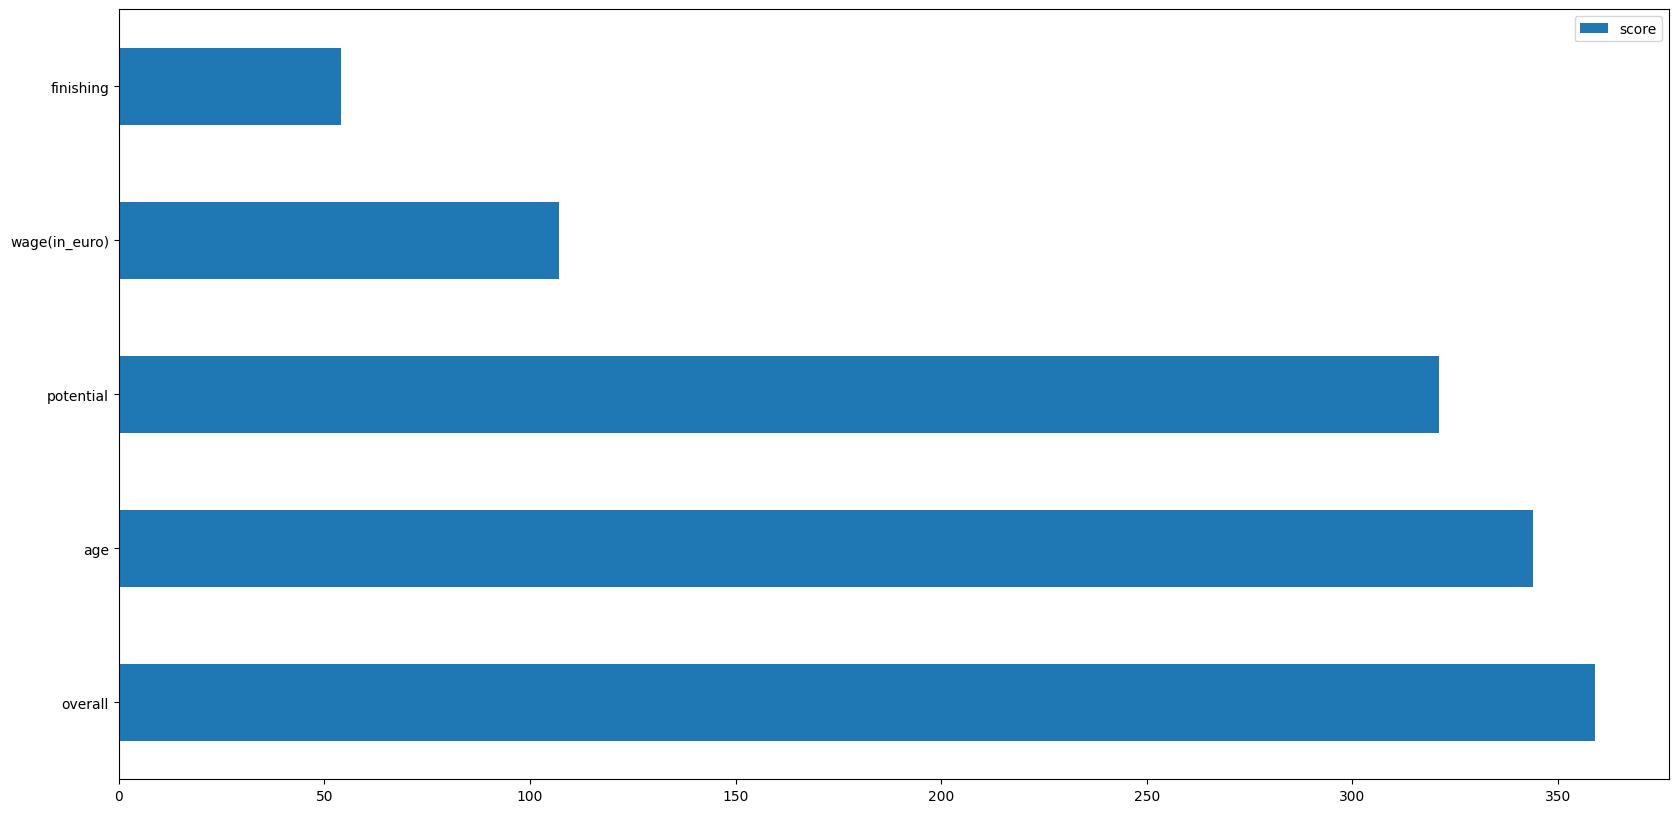

In [77]:
# Generate Top 5 Most Important Features
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(5, columns="score").plot(kind='barh', figsize = (20,10))

### 6 - Neural Networks using Keras Regressions

### Tensorflow - Keras

In [113]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [141]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

# Model
model = Sequential()
model.add(Dense(1000, input_dim=X.shape[1], activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
#model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics =[metrics.mae])


model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=50)
model.summary()


C:\Users\bradl\miniconda3\envs\ai_env\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10
266/266 [==============================] - 5s 18ms/step - loss: 51485039656960.0000 - val_loss: 40369823678464.0000
Epoch 2/10
266/266 [==============================] - 4s 17ms/step - loss: 17649199218688.0000 - val_loss: 30022112903168.0000
Epoch 3/10
266/266 [==============================] - 4s 17ms/step - loss: 16661165899776.0000 - val_loss: 28551730429952.0000
Epoch 4/10
266/266 [==============================] - 4s 17ms/step - loss: 16575418597376.0000 - val_loss: 28084969406464.0000
Epoch 5/10
266/266 [==============================] - 4s 16ms/step - loss: 16642449866752.0000 - val_loss: 28138014769152.0000
Epoch 6/10
266/266 [==============================] - 4s 17ms/step - loss: 16740456071168.0000 - val_loss: 28307034734592.0000
Epoch 7/10
266/266 [==============================] - 4s 16ms/step - loss: 16598509289472.0000 - val_loss: 28277406171136.0000
Epoch 8/10
266/266 [==============================] - 5s 17ms/step - loss: 16597413527552.0000 - val_loss: 2805

In [142]:
y_train_pred = model.predict(X_train)

461/461 [==============================] - 1s 3ms/step


In [143]:
nn_train_rscore = r2_score(y_train, y_train_pred)
nn_train_rscore

0.6780851963581185

#### Test the Data

In [144]:
y_test_pred = model.predict(X_test)

116/116 [==============================] - 0s 3ms/step


In [145]:
nn_test_rscore = r2_score(y_test, y_test_pred)
nn_test_rscore

0.6568034827397533

#### Compare predicted prices and true prices in the test set

In [146]:
compare = pd.DataFrame()
compare['True Value'] = y_test
compare['Predicted Value'] = y_test_pred.round()
compare.head(10)

,True Value,Predicted Value
7109,1100000,792930.0
2415,6000000,15052879.0
15810,60000,513168.0
17164,350000,469237.0
16148,450000,426831.0
14216,650000,379617.0
3756,3800000,1548324.0
15290,550000,790380.0
17311,300000,739364.0
10217,1500000,795486.0


### Remark
Neural Network achieves a low $R^2$-score, which is above 0.13, on the test set, and 0.21 on the training set. In the meantime, we notice a gap between the training score (above 0.99) and the test score (above 0.98).

### $R^2$-score Summary

In [147]:
print('1A - Unvariable Linear Regression Training $R^2$-score: ', lr1_train_rscore)
print('1B - Multivariate Linear Regression Training $R^2$-score: ', lr2_train_rscore)

print('2 - KNN (K-nearest Neighbors) Training $R^2$-score: ', knn_train_rscore)
print('2 - KNN (K-nearest Neighbors) Testing $R^2$-score: ', knn_test_rscore)

print('3 - Decision Tree Regressor Training $R^2$-score: ', dt_train_rscore)
print('3 - Decision Tree Regressor Testing $R^2$-score: ', dt_test_rscore)

print('4 - Random Forest Training $R^2$-score: ', rf_train_rscore)
print('4 - Random Forest Testing $R^2$-score: ', rf_test_rscore)

print('5 - XG Boosting Training $R^2$-score: ', xgb_train_rscore)
print('5 - XG Boosting Testing $R^2$-score: ', xgb_test_rscore)

print('6 - Neural Network Training $R^2$-score: ', nn_train_rscore)
print('6 - Neural Network Testing $R^2$-score: ', nn_test_rscore)



1A - Unvariable Linear Regression Training $R^2$-score:  0.32070655872118725
1B - Multivariate Linear Regression Training $R^2$-score:  0.7876944204044731
2 - KNN (K-nearest Neighbors) Training $R^2$-score:  0.7553938984883896
2 - KNN (K-nearest Neighbors) Testing $R^2$-score:  0.7053475485263165
3 - Decision Tree Regressor Training $R^2$-score:  0.9878898330173511
3 - Decision Tree Regressor Testing $R^2$-score:  0.9400718388245871
4 - Random Forest Training $R^2$-score:  0.9858240643112788
4 - Random Forest Testing $R^2$-score:  0.9678216525912616
5 - XG Boosting Training $R^2$-score:  0.9991731727148223
5 - XG Boosting Testing $R^2$-score:  0.9898457196034892
6 - Neural Network Training $R^2$-score:  0.6780851963581185
6 - Neural Network Testing $R^2$-score:  0.6568034827397533


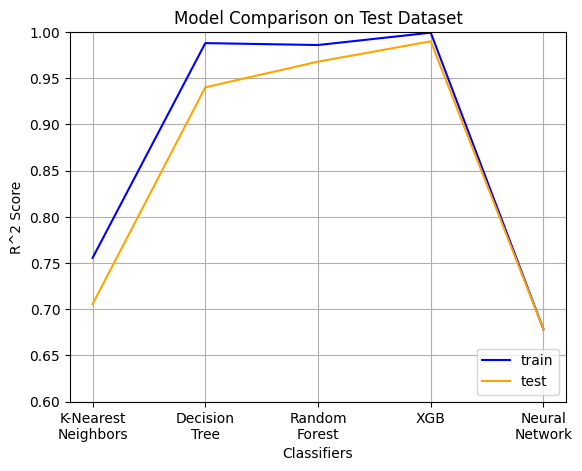

In [148]:
plt.plot(['K-Nearest\nNeighbors','Decision\nTree','Random\nForest', 'XGB', 'Neural\nNetwork'],
         [knn_train_rscore,
          dt_train_rscore,
          rf_train_rscore,
          xgb_train_rscore,
          nn_train_rscore],
        color = 'Blue')
plt.plot(['K-Nearest\nNeighbors','Decision\nTree','Random\nForest', 'XGB', 'Neural\nNetwork'],
         [knn_test_rscore,
          dt_test_rscore,
          rf_test_rscore,
          xgb_test_rscore,
          nn_train_rscore],
        color = 'Orange')
plt.ylim(0.6,1)
plt.ylabel('R^2 Score')
plt.xlabel('Classifiers')
plt.title('Model Comparison on Test Dataset')
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
plt.show()